In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
# %qtconsole

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr

import logging
logging.basicConfig(level=logging.INFO)

# Sorted Spikes

In [3]:
from glob import glob
import os
from src.parameters import PROCESSED_DATA_DIR, STATE_COLORS
from src.visualization import (plot_category_counts, plot_category_duration)

data_type, dim = 'sorted_spikes', '1D'
n_unique_spiking = 5

def add_animal_info(file_path, replay_info):
    animal, day, epoch = file_path.split('/')[-1].split('_')[:3]
    day, epoch = int(day), int(epoch)
    replay_info['animal'] = animal
    replay_info['day'] = animal
    replay_info['epoch'] = animal
    
    return replay_info

file_paths = glob(os.path.join(PROCESSED_DATA_DIR, f'*_{data_type}_{dim}_replay_info.csv'))
replay_info = (pd.concat(
                 [add_animal_info(file_path, pd.read_csv(file_path)) for file_path in file_paths], axis=0)
               .set_index(['animal', 'day', 'epoch', 'ripple_number']))
replay_info = replay_info.loc[replay_info.n_unique_spiking >= n_unique_spiking]

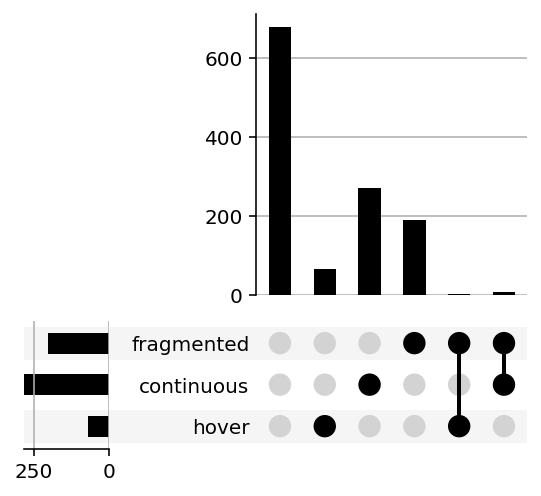

In [4]:
plot_category_counts(replay_info);

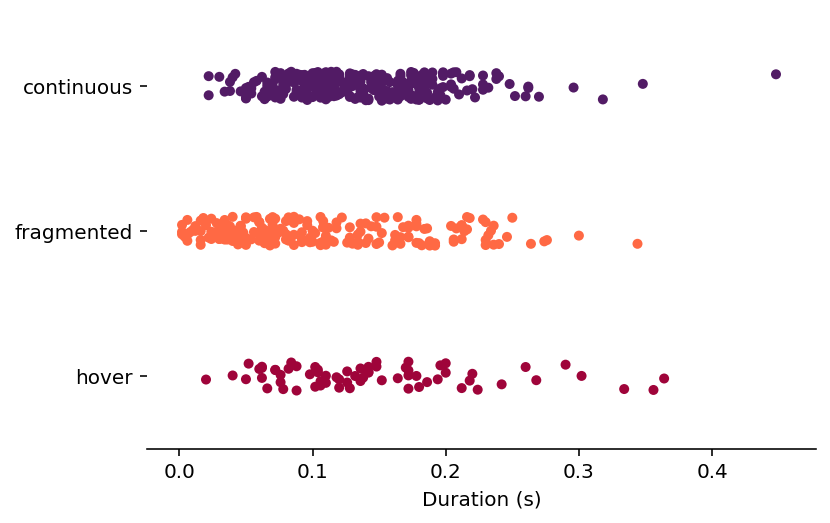

In [5]:
plt.figure()
plot_category_duration(replay_info)

Text(0.5, 0, 'Total Duration')

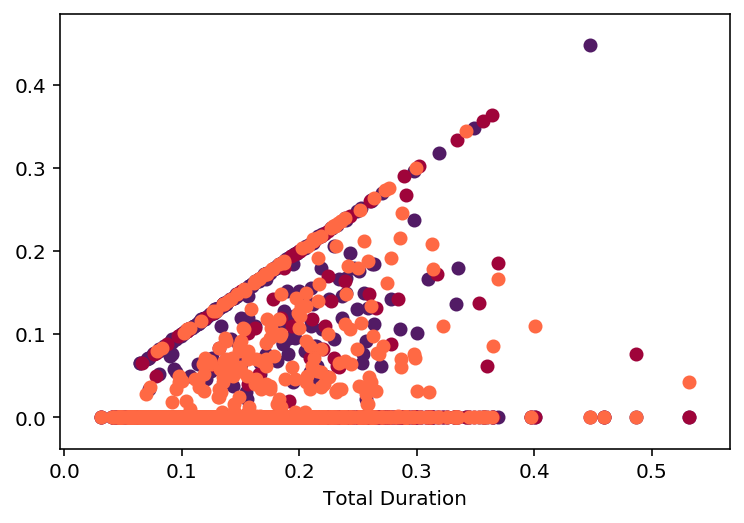

In [6]:
plt.scatter(replay_info.duration, replay_info.continuous_duration, color=STATE_COLORS['continuous'])
plt.scatter(replay_info.duration, replay_info.hover_duration, color=STATE_COLORS['hover'])
plt.scatter(replay_info.duration, replay_info.fragmented_duration, color=STATE_COLORS['fragmented'])
plt.xlabel('Total Duration')

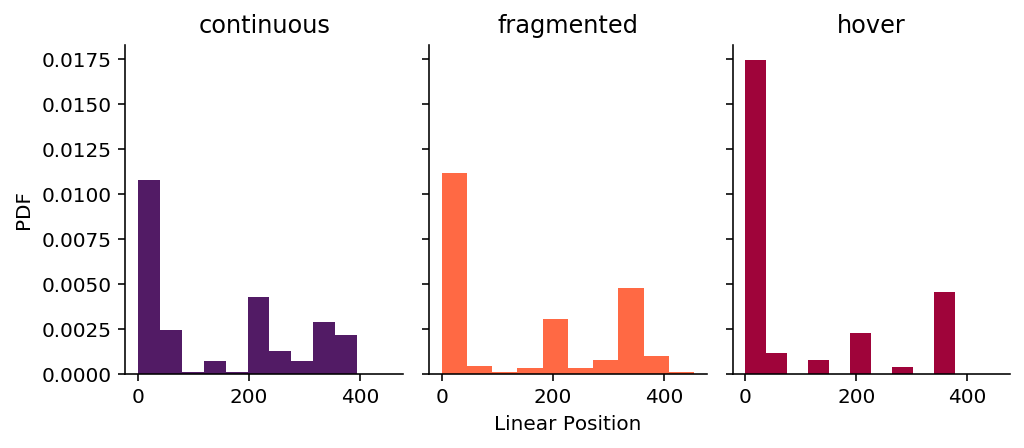

In [7]:
state_names = ['continuous', 'fragmented', 'hover']
fig, axes = plt.subplots(1, len(state_names), figsize=(7, 3),
                         sharex=True, sharey=True, constrained_layout=True)

for ax, state_name in zip(axes.flat, state_names):
    ax.hist(replay_info.loc[replay_info[state_name]].avg_actual_linear_position2,
            density=True, bins=10, color=STATE_COLORS[state_name])
    ax.set_title(state_name)
    
axes.flat[len(state_names) // 2].set_xlabel('Linear Position')
axes[0].set_ylabel('PDF')
sns.despine()

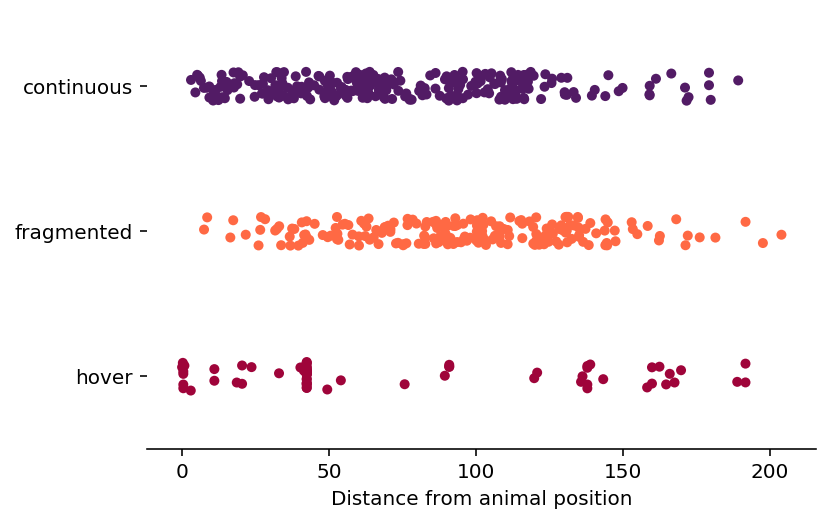

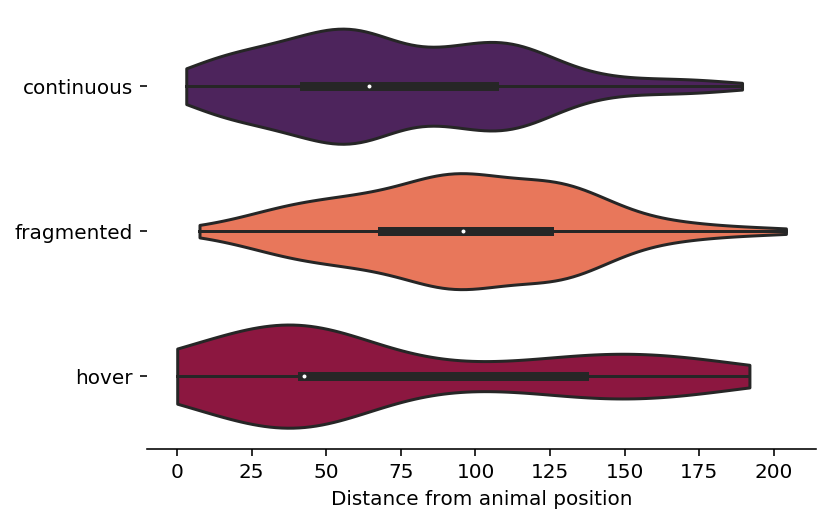

In [8]:
is_col = replay_info.columns.str.endswith('_replay_distance')
sns.stripplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('Distance from animal position')
sns.despine(left=True)

plt.figure()
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0)
plt.xlabel('Distance from animal position')
sns.despine(left=True)


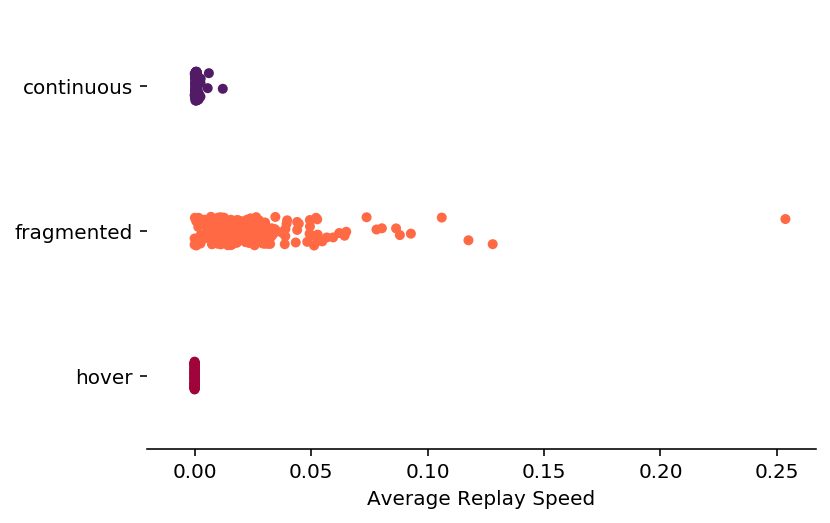

In [9]:
is_col = replay_info.columns.str.endswith('_replay_speed')
sns.stripplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('Average Replay Speed')
sns.despine(left=True)

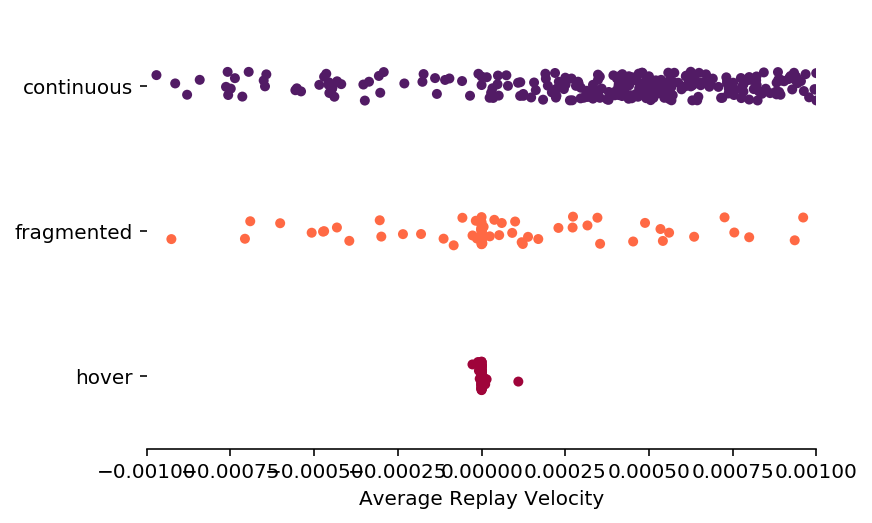

In [10]:
is_col = replay_info.columns.str.endswith('_replay_velocity')
sns.stripplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('Average Replay Velocity')
plt.xlim([-0.001, 0.001])
sns.despine(left=True)

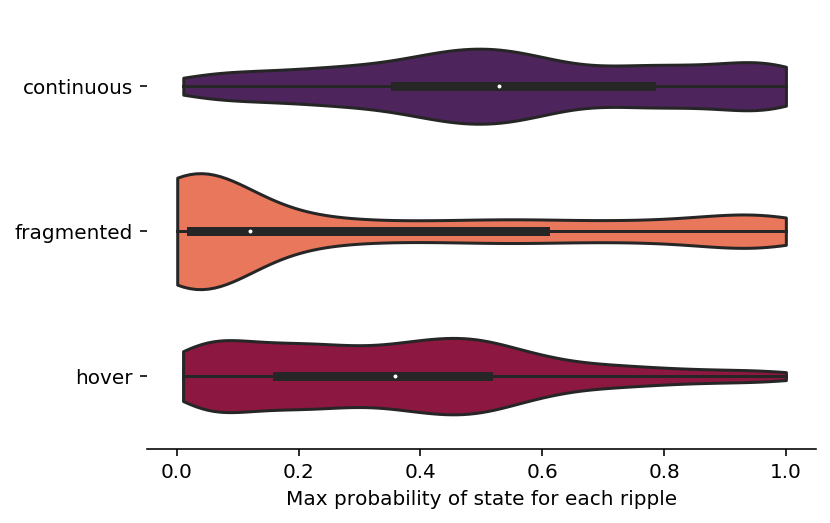

In [11]:
plt.figure()
is_col = replay_info.columns.str.endswith('_max_probability')
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0)
plt.xlabel('Max probability of state for each ripple')
sns.despine(left=True)

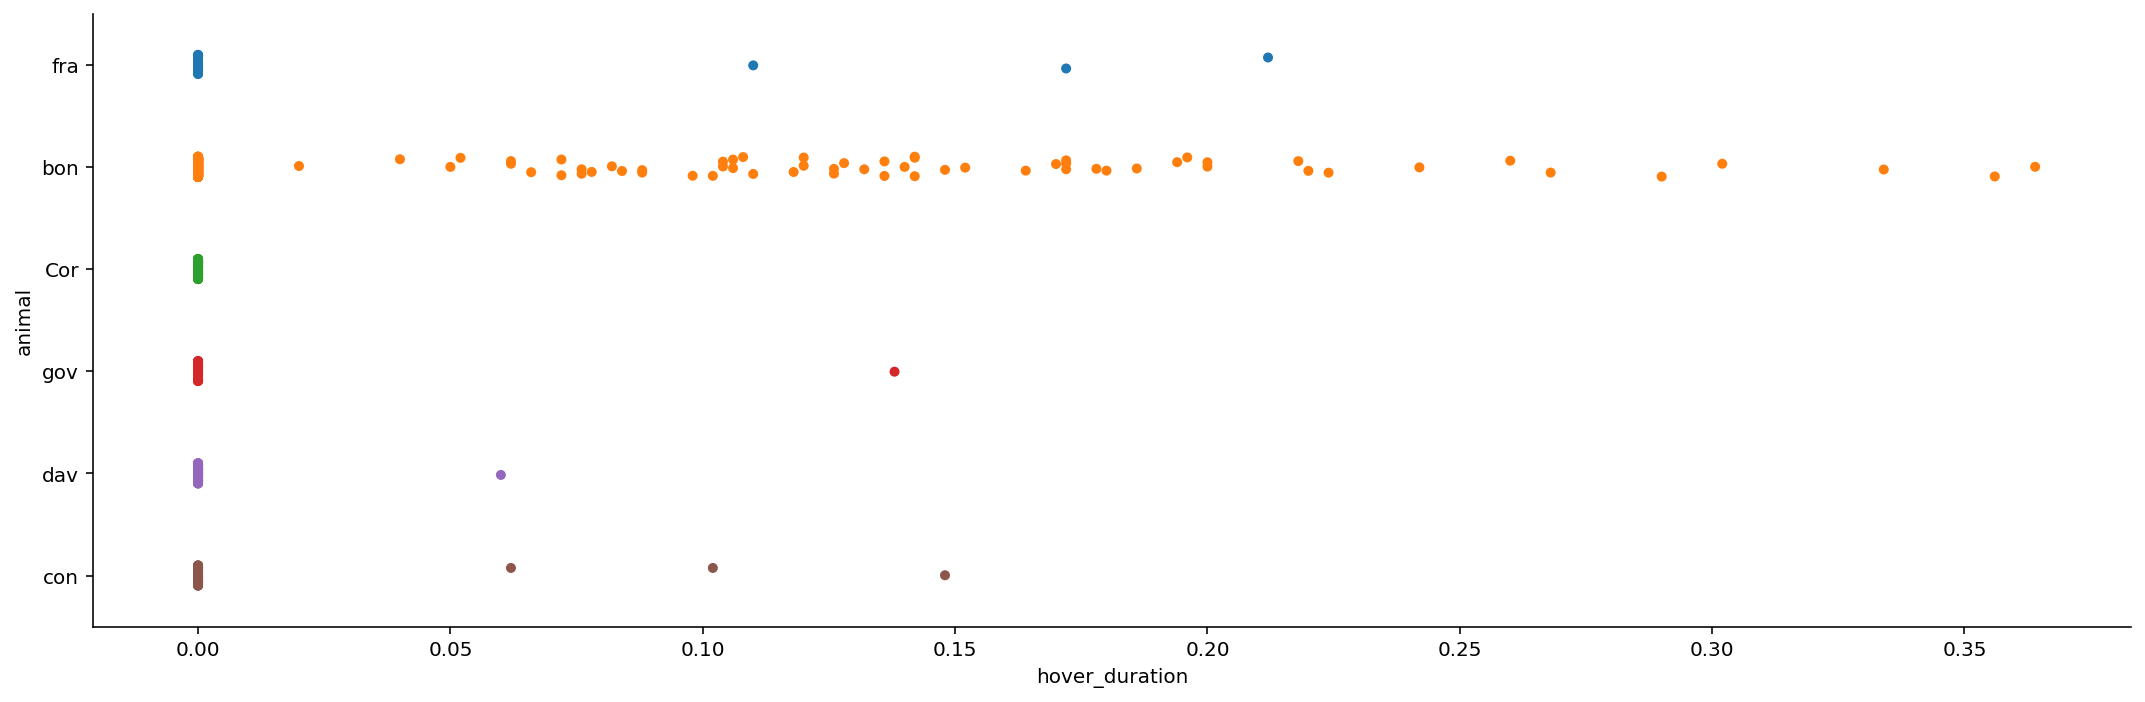

In [12]:
sns.catplot(x='hover_duration', y='animal', data=replay_info.reset_index(), kind="strip", jitter=True, aspect=3)

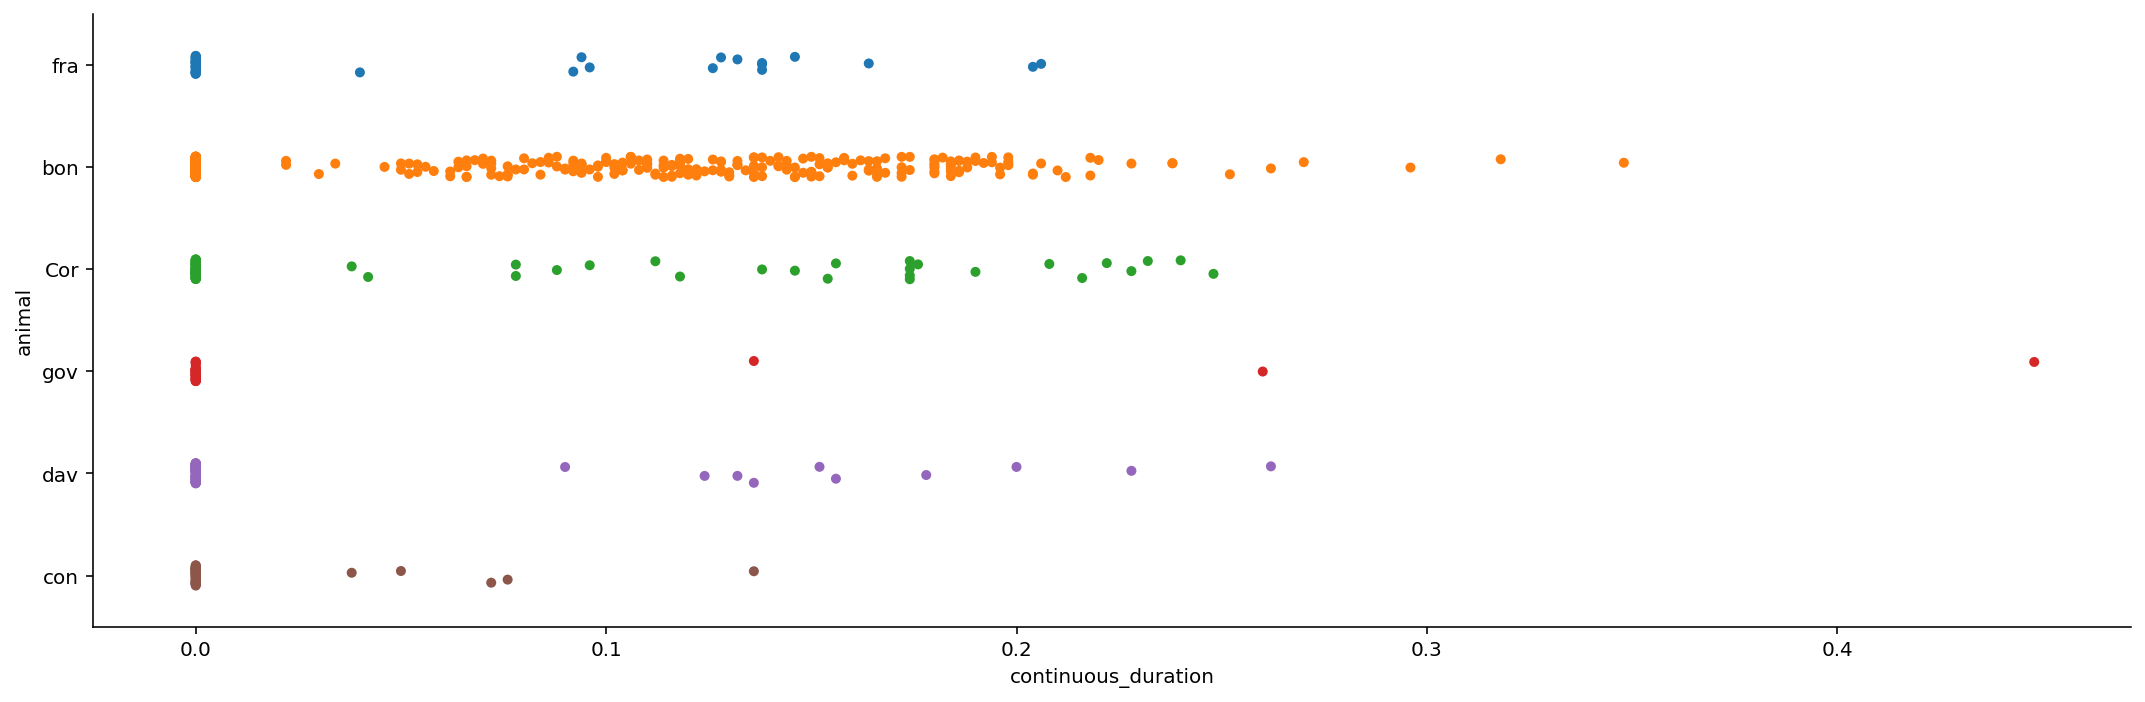

In [13]:
sns.catplot(x='continuous_duration', y='animal', data=replay_info.reset_index(), kind="strip", jitter=True, aspect=3)

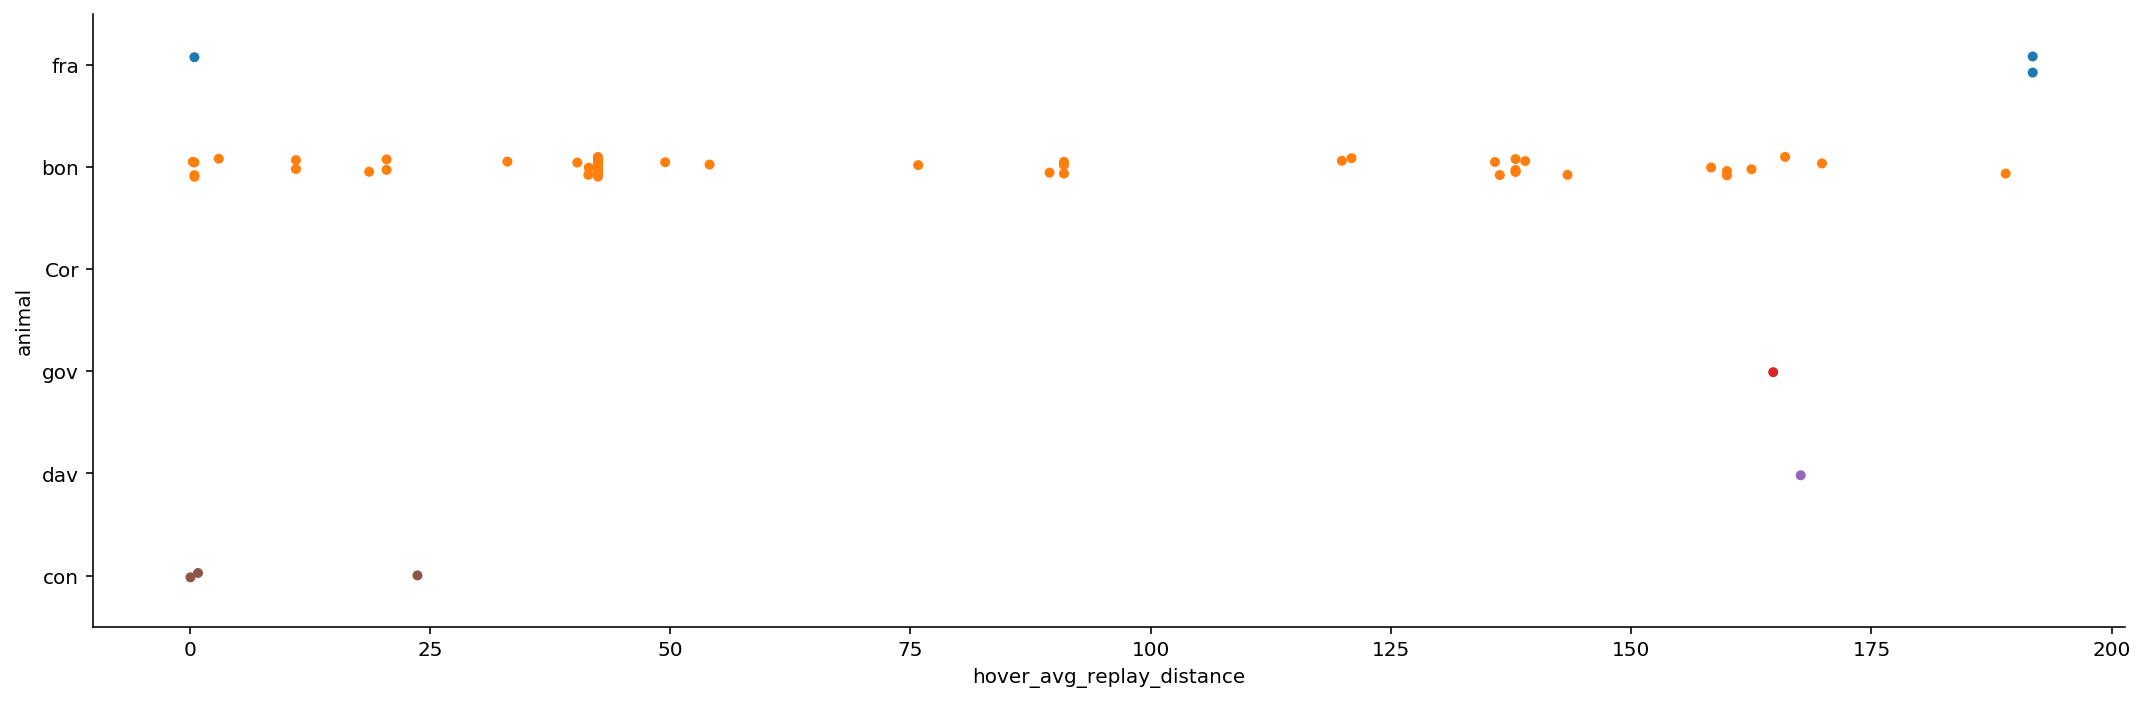

In [14]:
sns.catplot(x='hover_avg_replay_distance', y='animal', data=replay_info.reset_index(), kind="strip", jitter=True, aspect=3)

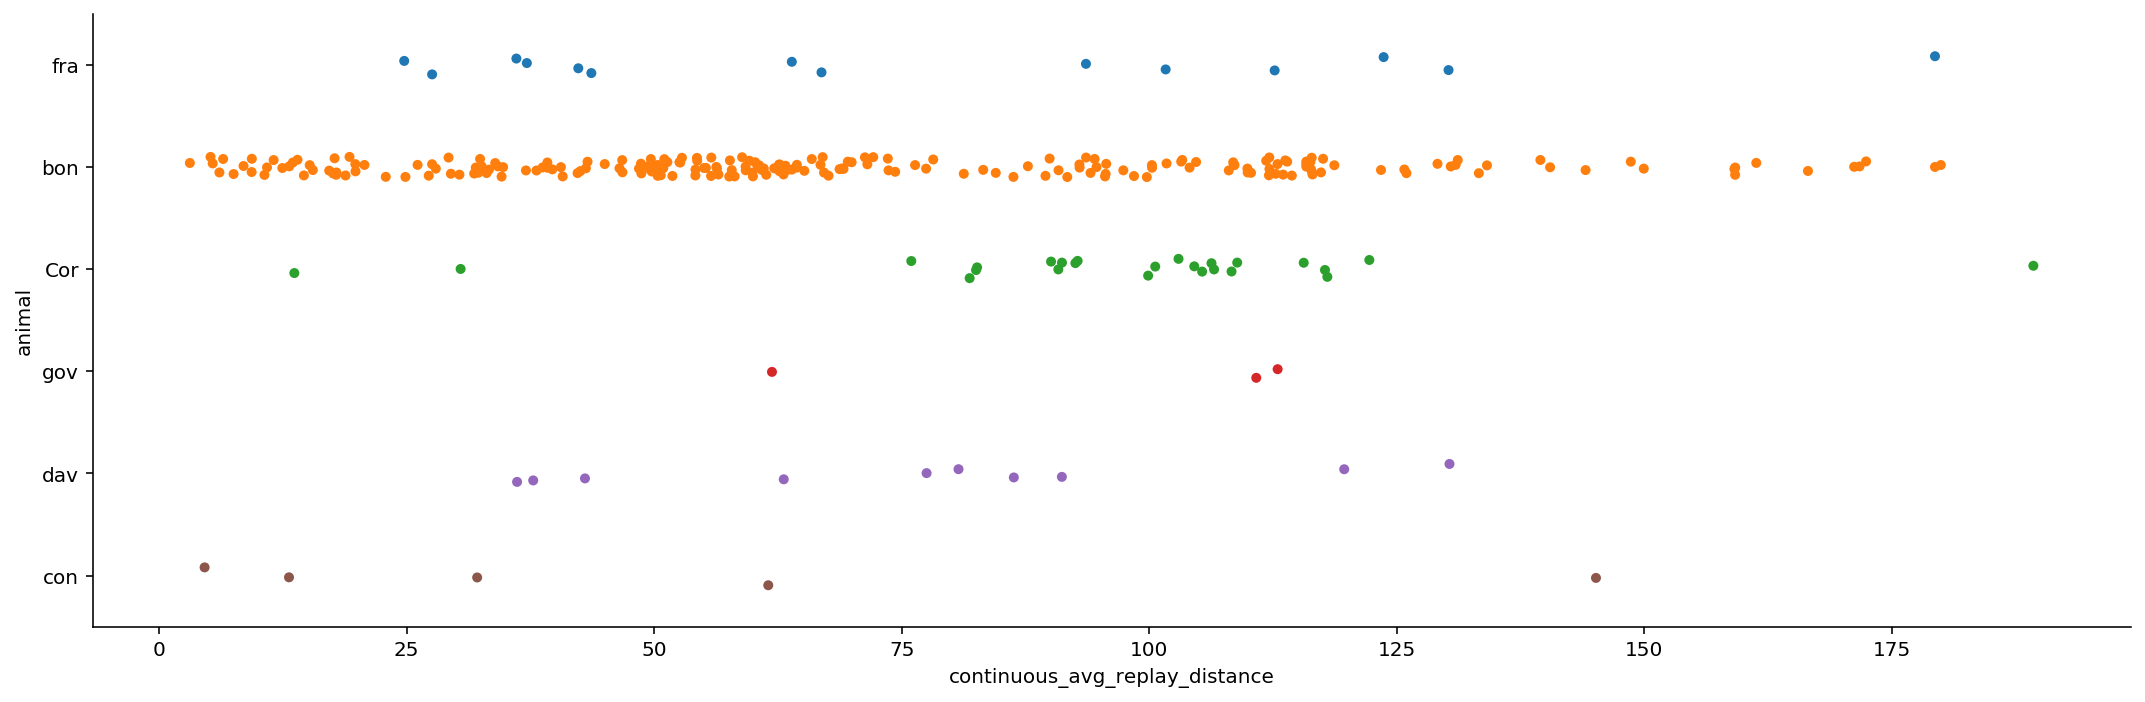

In [15]:
sns.catplot(x='continuous_avg_replay_distance', y='animal', data=replay_info.reset_index(), kind="strip", jitter=True, aspect=3)

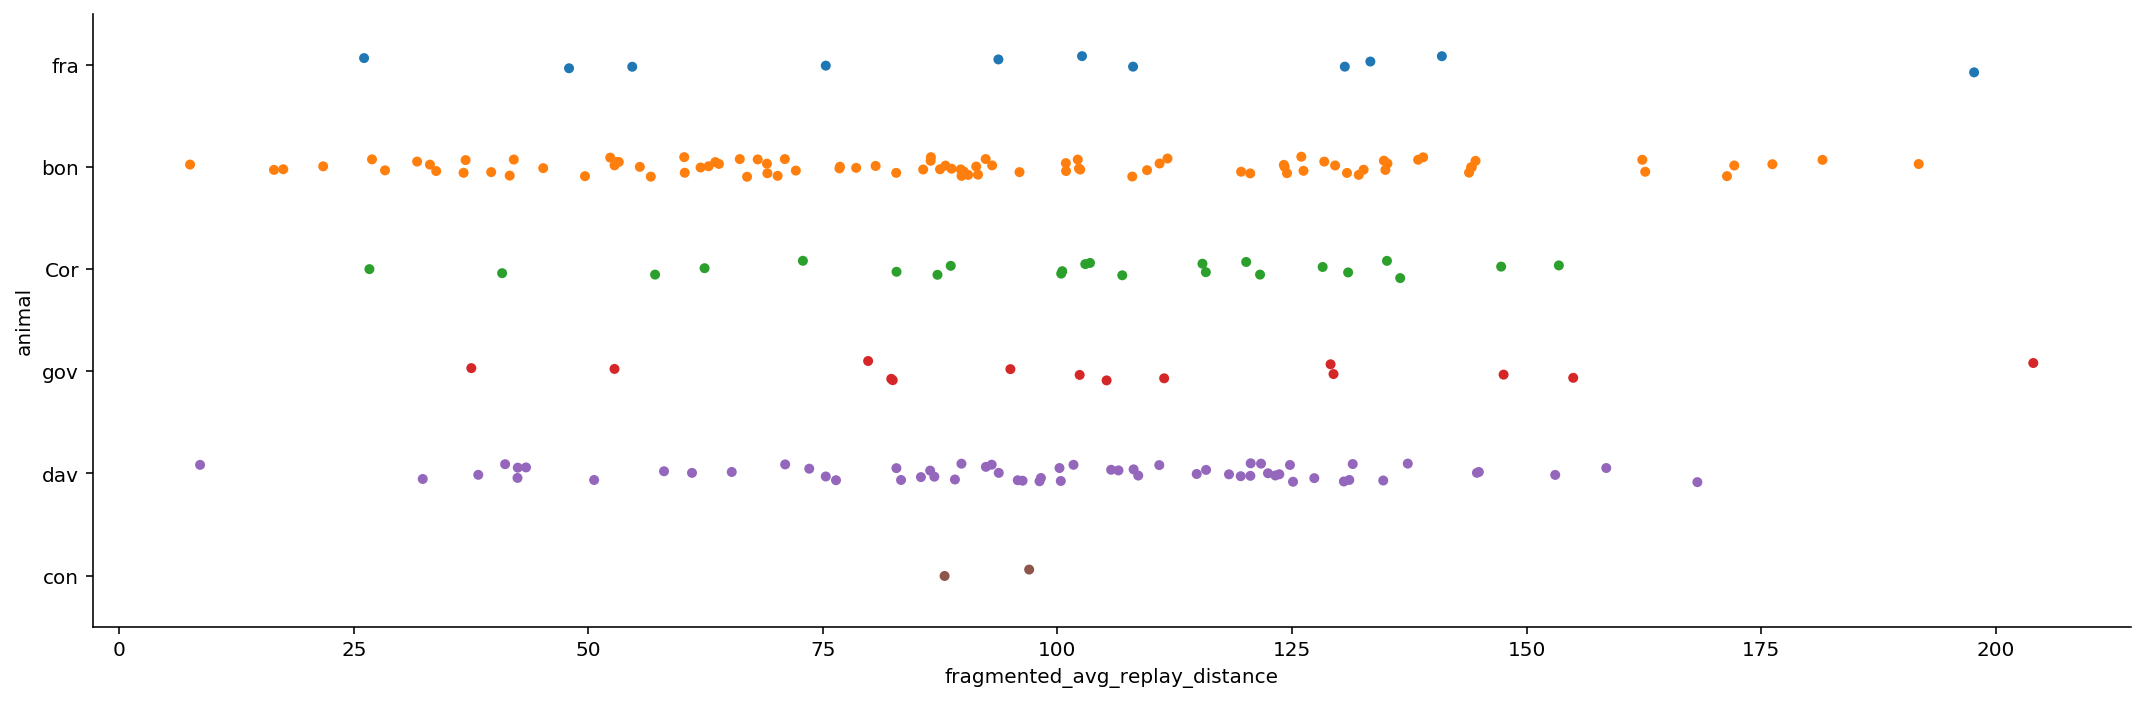

In [16]:
sns.catplot(x='fragmented_avg_replay_distance', y='animal', data=replay_info.reset_index(), kind="strip", jitter=True, aspect=3)

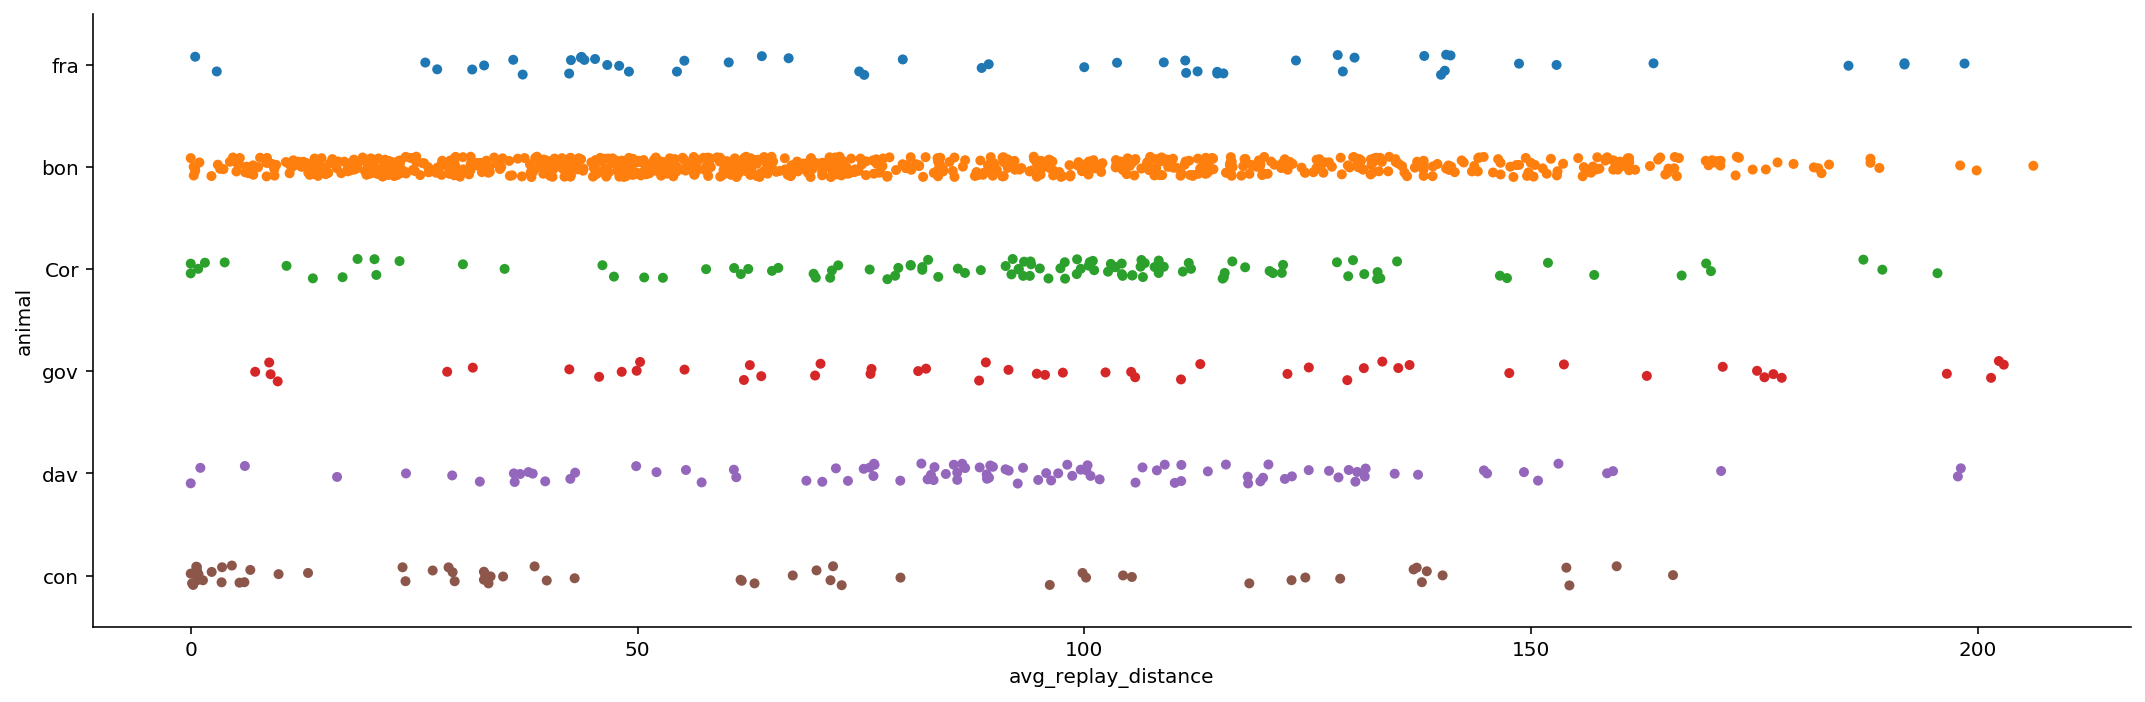

In [17]:
sns.catplot(x='avg_replay_distance', y='animal', data=replay_info.reset_index(), kind="strip", jitter=True, aspect=3)

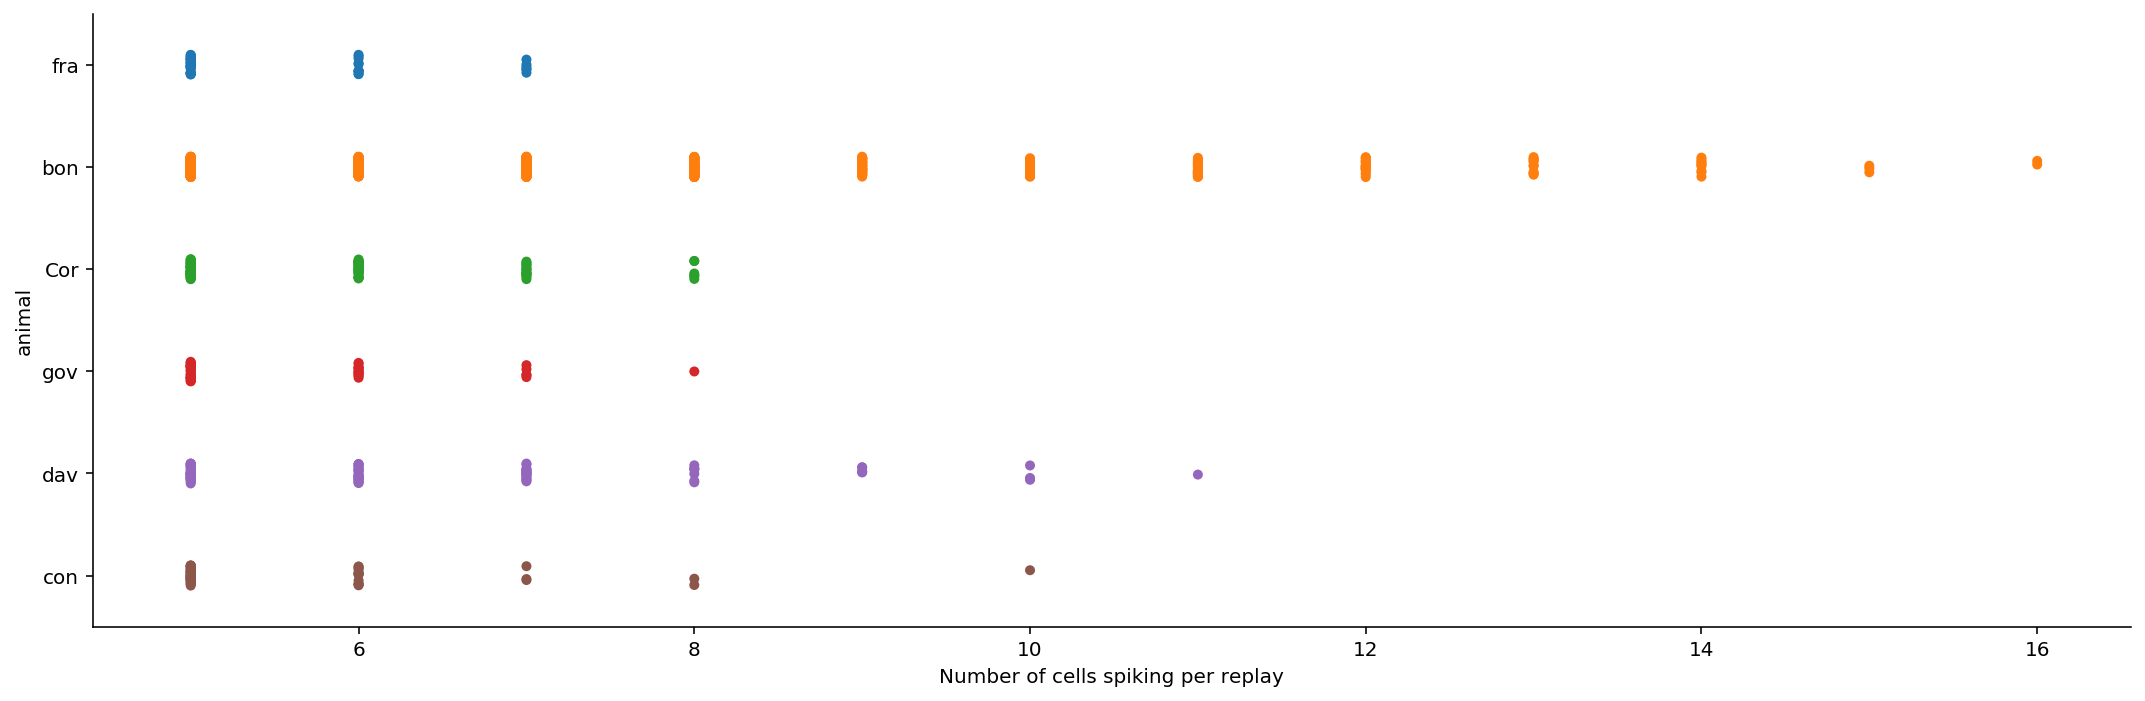

In [18]:
sns.catplot(x='n_unique_spiking', y='animal', data=replay_info.reset_index(), kind="strip", jitter=True, aspect=3)
plt.xlabel('Number of cells spiking per replay');

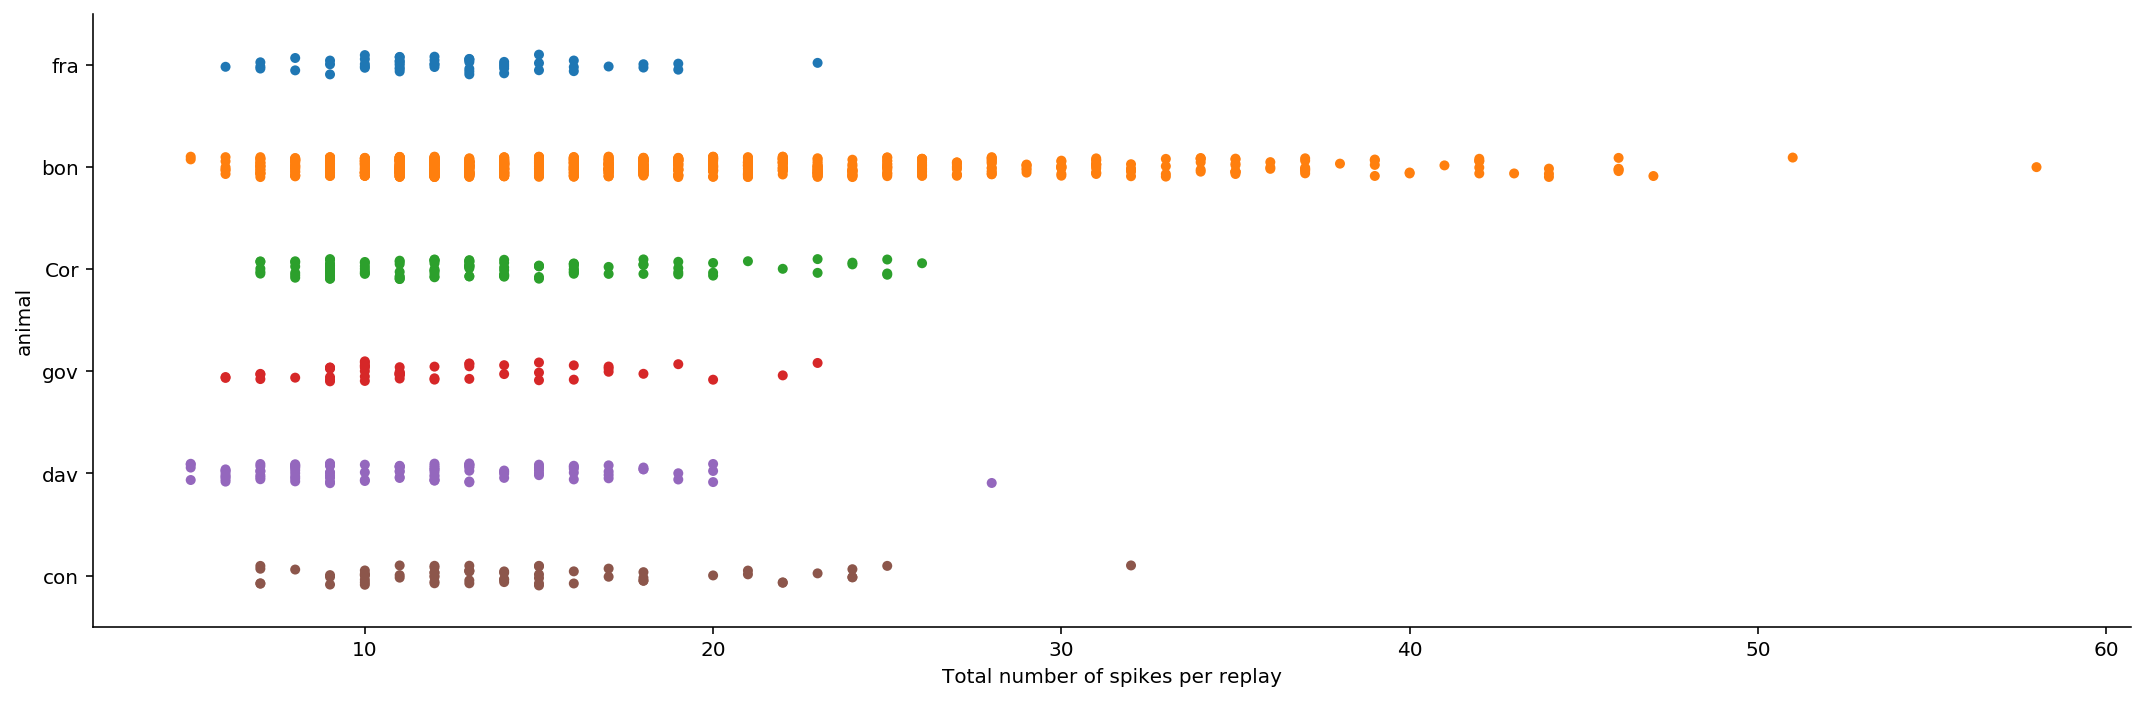

In [19]:
sns.catplot(x='n_total_spikes', y='animal', data=replay_info.reset_index(), kind="strip", aspect=3)
plt.xlabel('Total number of spikes per replay');

# Clusterless

In [20]:
data_type, dim = 'clusterless', '1D'
n_unique_spiking = 2

file_paths = glob(os.path.join(PROCESSED_DATA_DIR, f'*_{data_type}_{dim}_replay_info.csv'))
replay_info = (pd.concat(
                 [add_animal_info(file_path, pd.read_csv(file_path)) for file_path in file_paths], axis=0)
               .set_index(['animal', 'day', 'epoch', 'ripple_number']))
replay_info = replay_info.loc[replay_info.n_unique_spiking >= n_unique_spiking]

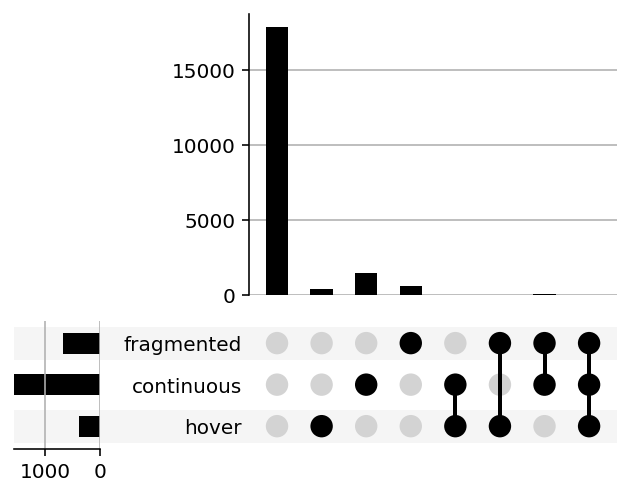

In [21]:
plot_category_counts(replay_info);

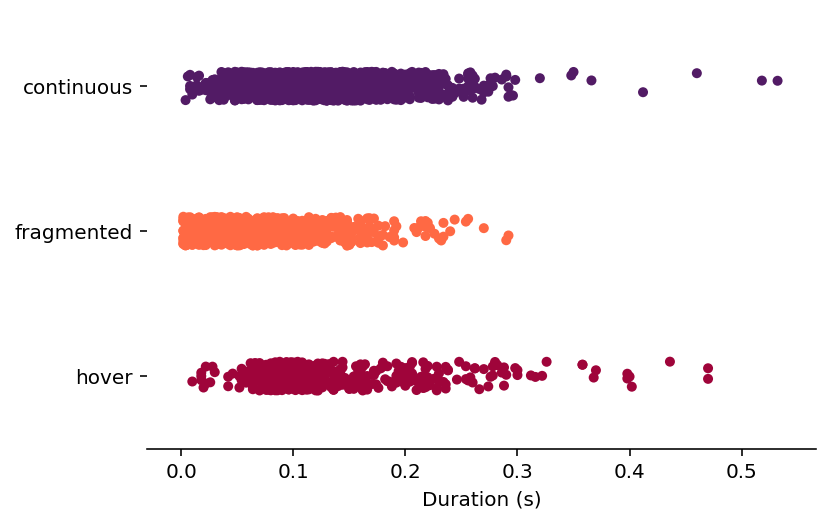

In [22]:
plt.figure()
plot_category_duration(replay_info)

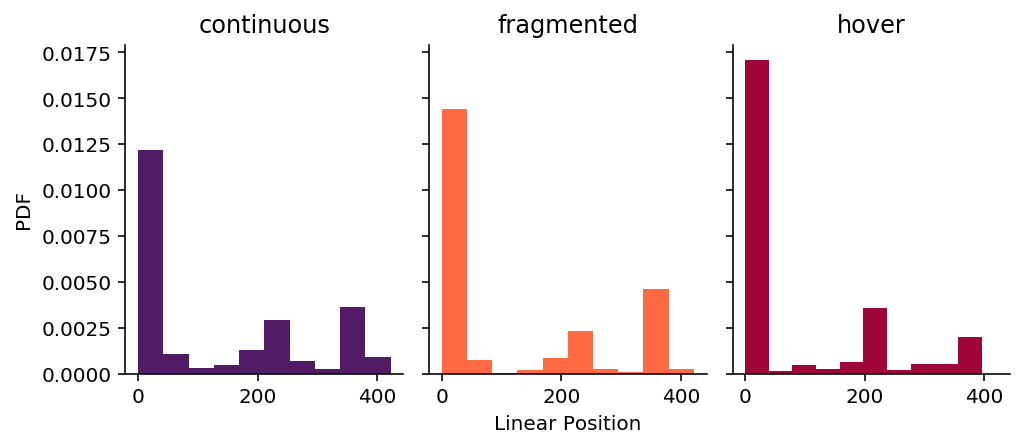

In [23]:
from src.parameters import STATE_COLORS

state_names = ['continuous', 'fragmented', 'hover']
fig, axes = plt.subplots(1, len(state_names), figsize=(7, 3),
                         sharex=True, sharey=True, constrained_layout=True)

for ax, state_name in zip(axes.flat, state_names):
    ax.hist(replay_info.loc[replay_info[state_name]].linear_position2,
            density=True, bins=10, color=STATE_COLORS[state_name])
    ax.set_title(state_name)
    
axes.flat[len(state_names) // 2].set_xlabel('Linear Position')
axes[0].set_ylabel('PDF')
sns.despine()

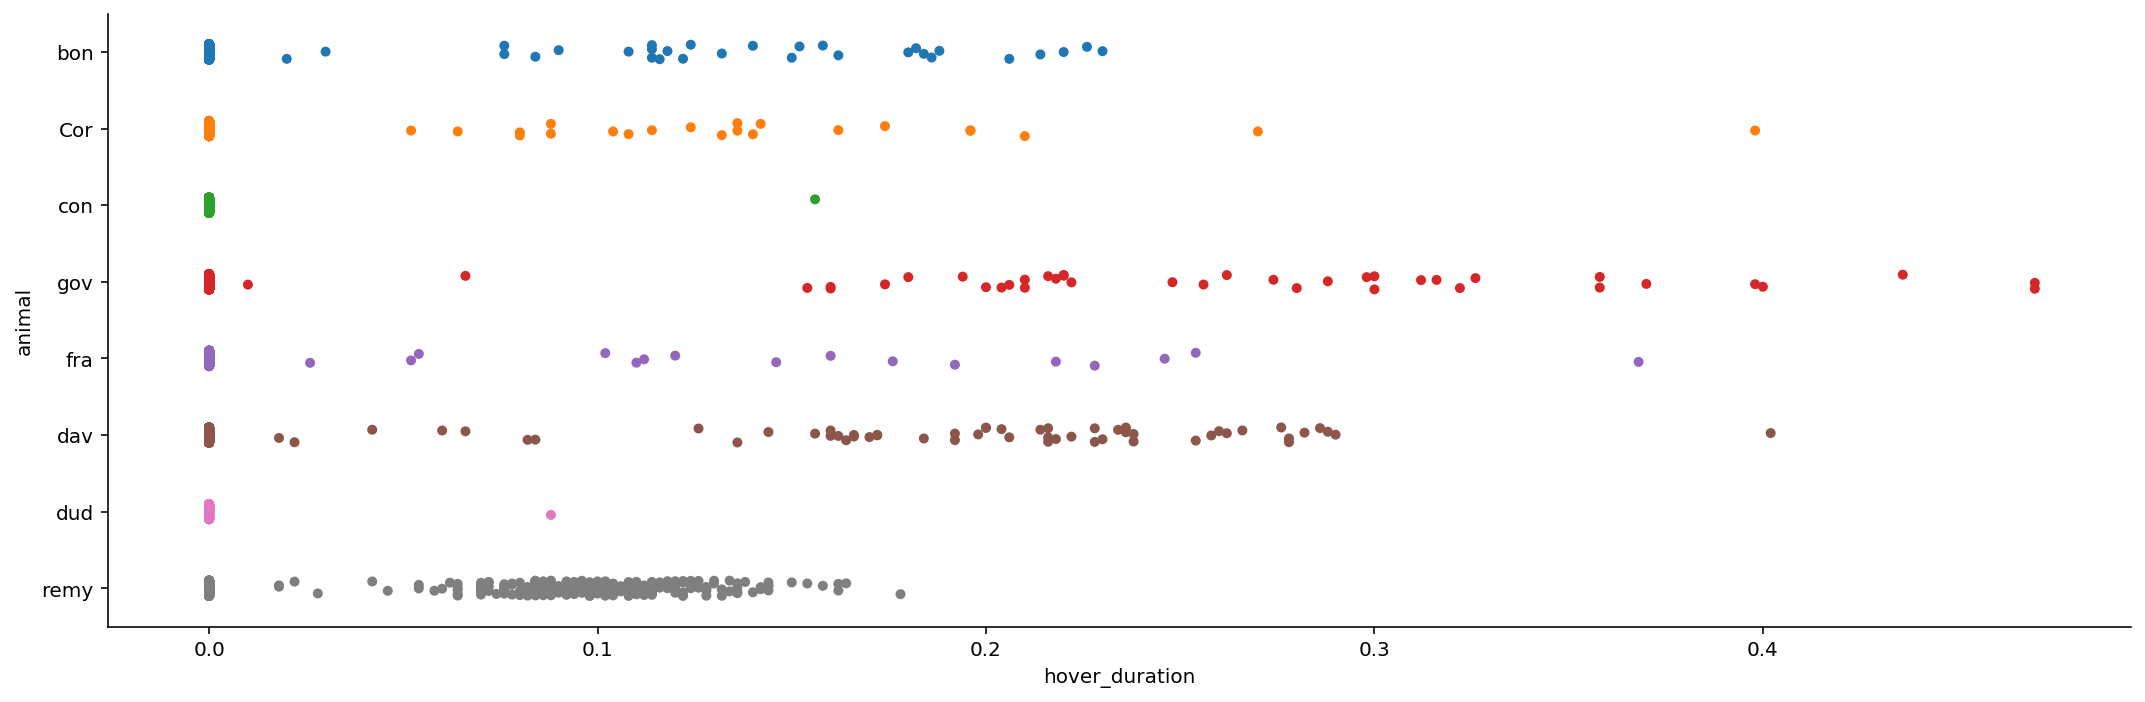

In [24]:
sns.catplot(x='hover_duration', y='animal', data=replay_info.reset_index(), kind="strip", aspect=3)

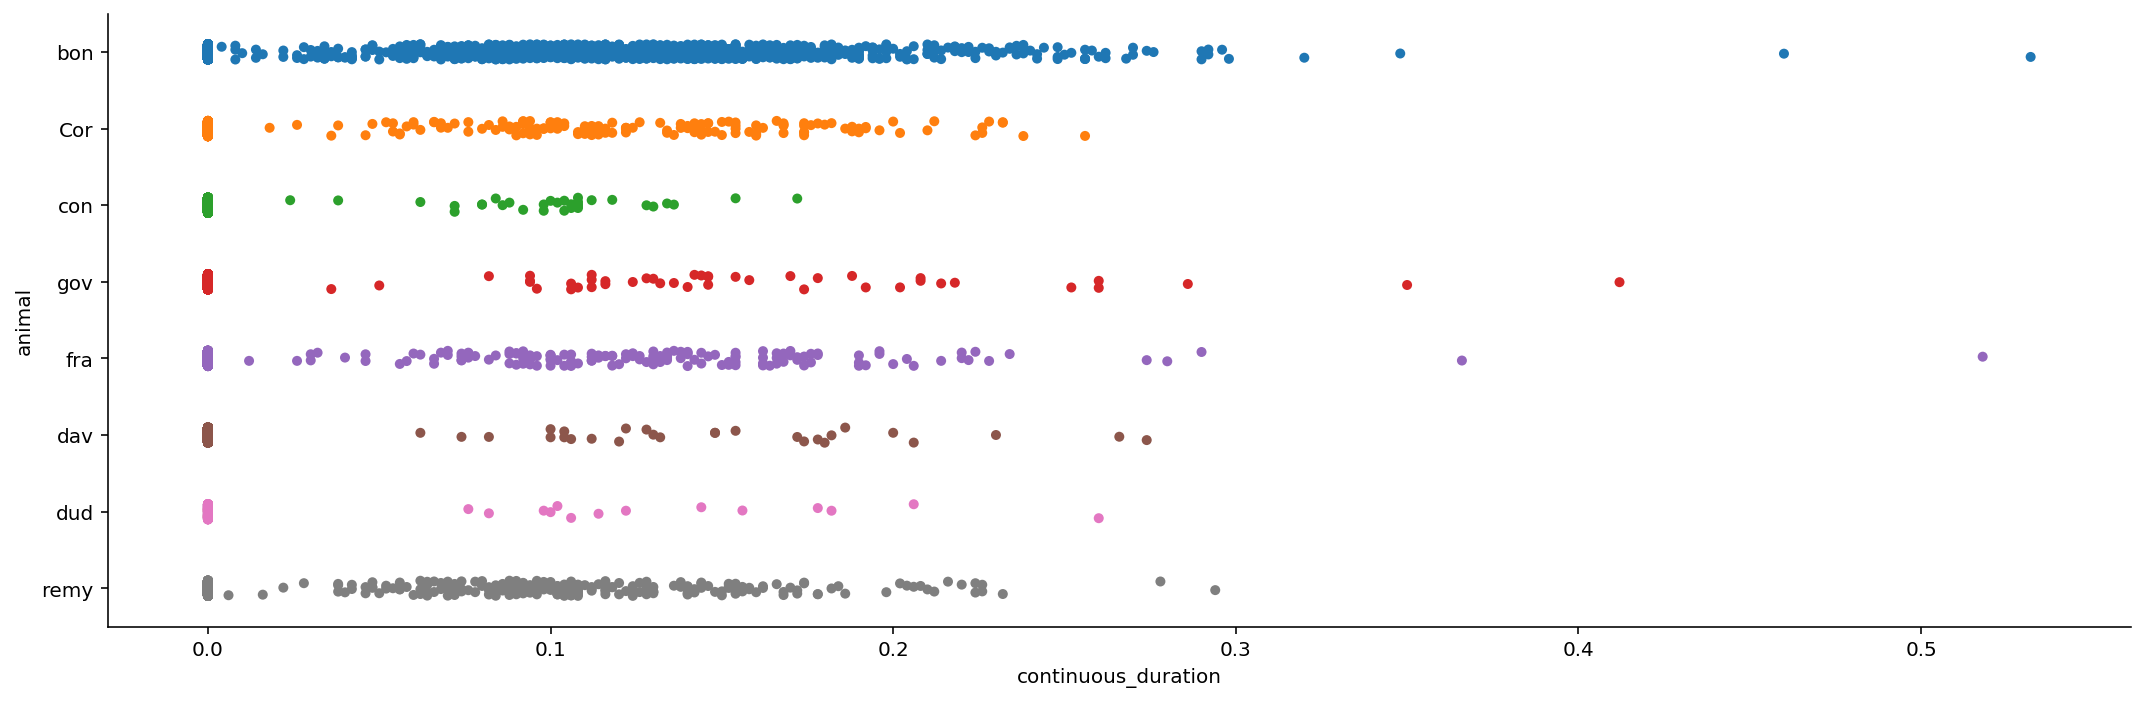

In [25]:
sns.catplot(x='continuous_duration', y='animal', data=replay_info.reset_index(), kind="strip", aspect=3)

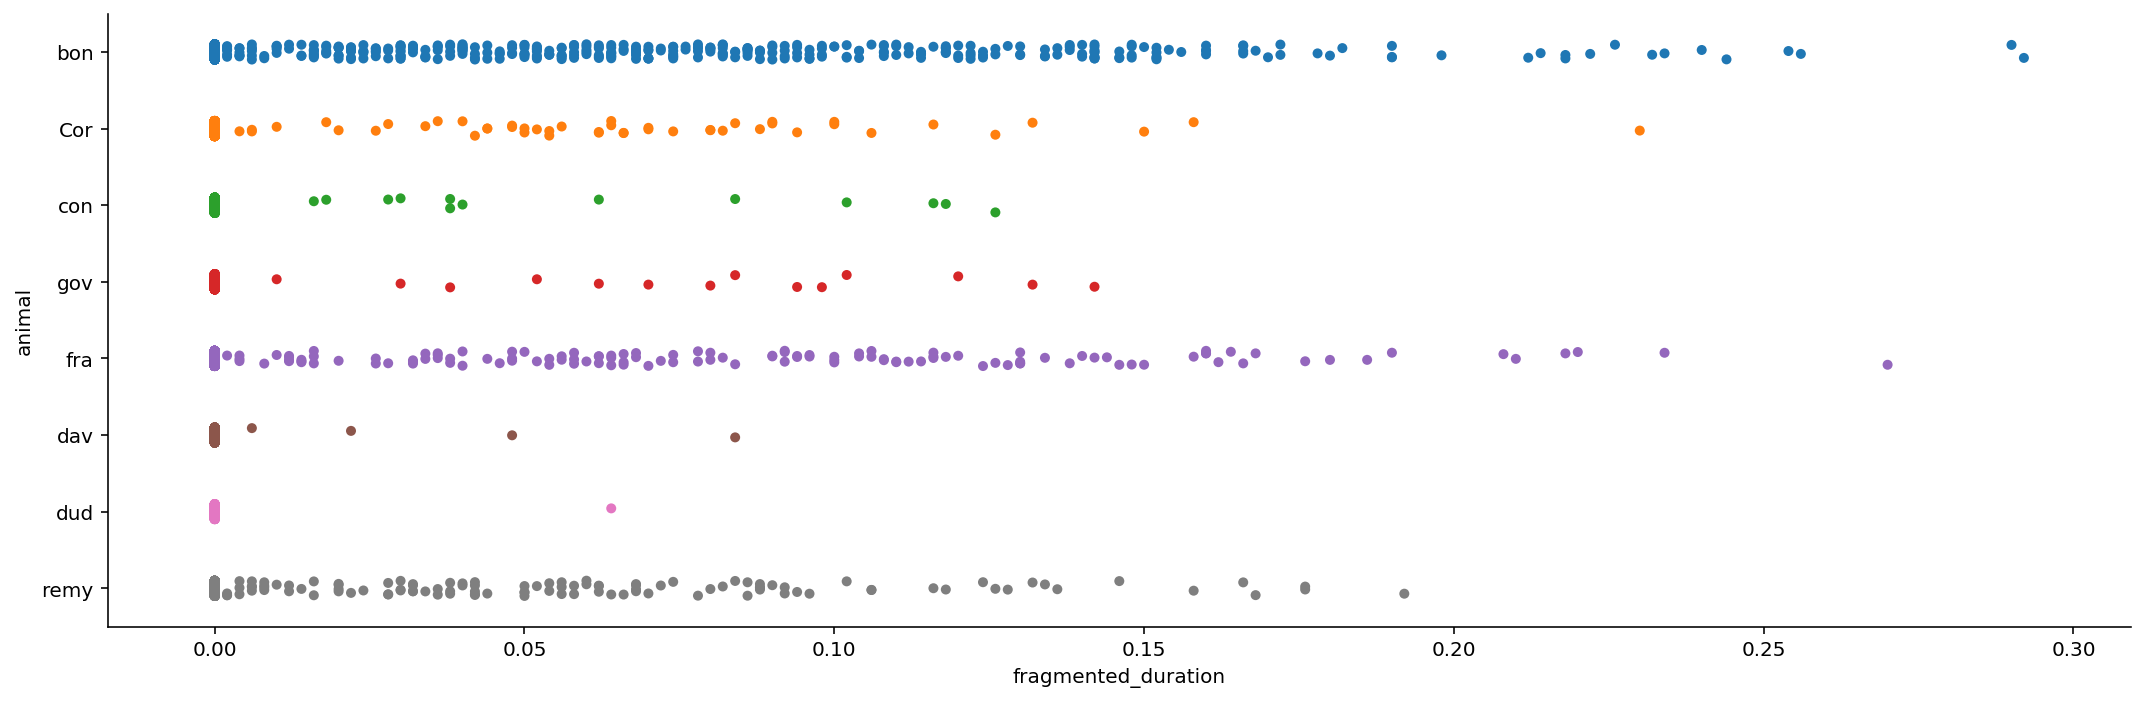

In [26]:
sns.catplot(x='fragmented_duration', y='animal', data=replay_info.reset_index(), kind="strip", aspect=3)

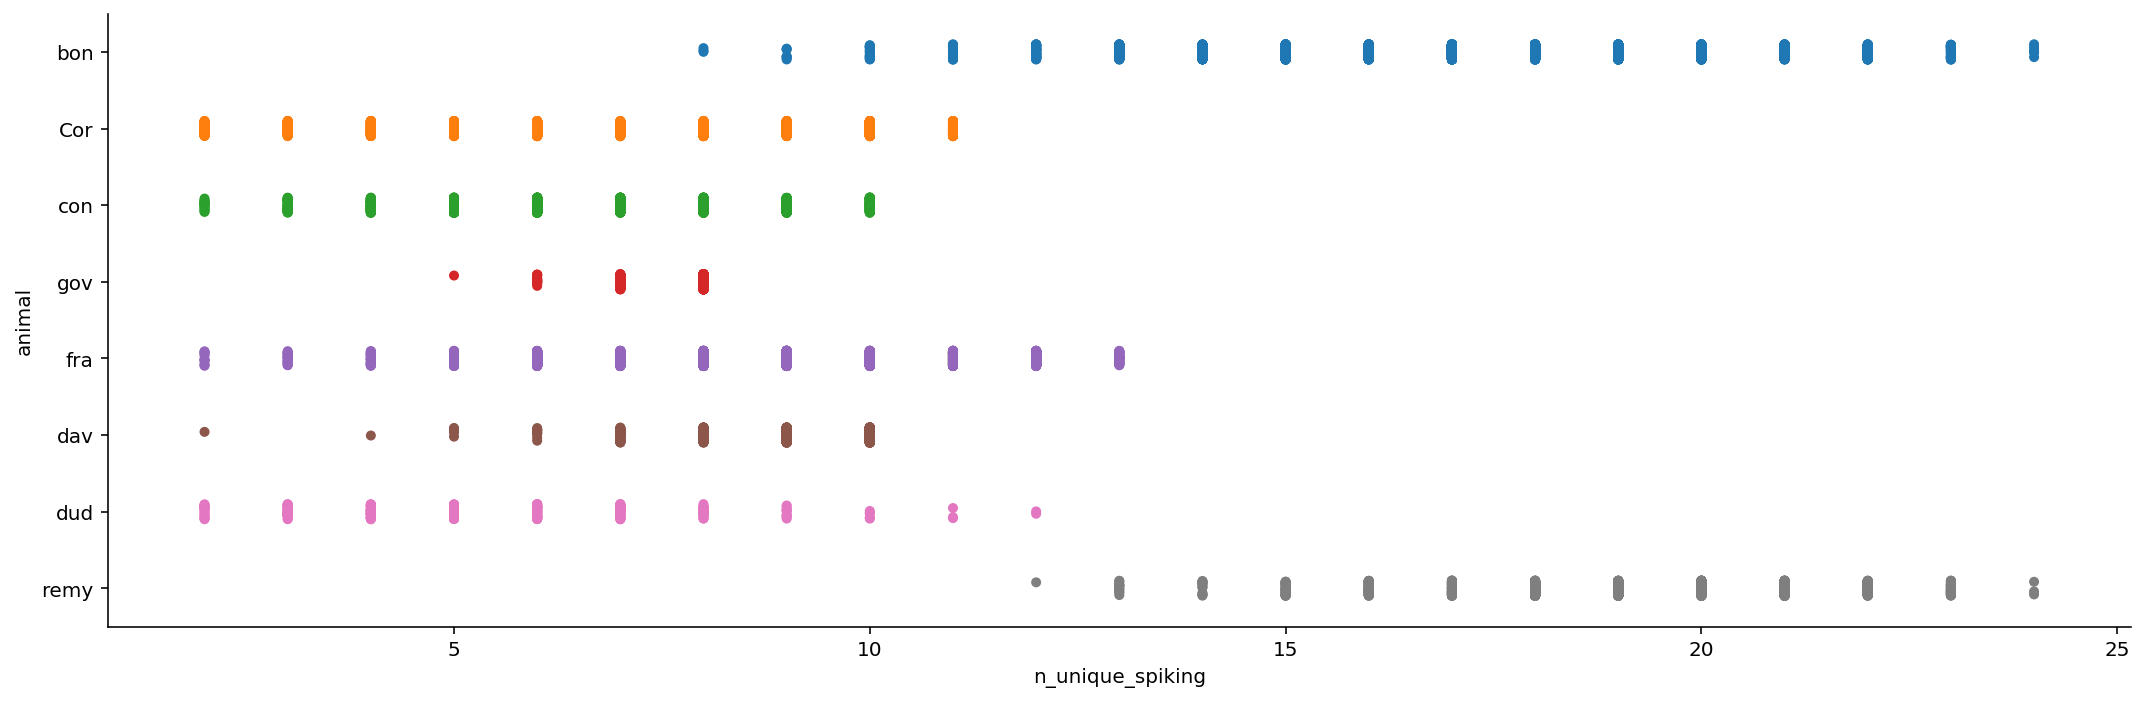

In [27]:
sns.catplot(x='n_unique_spiking', y='animal', data=replay_info.reset_index(), kind="strip", aspect=3)

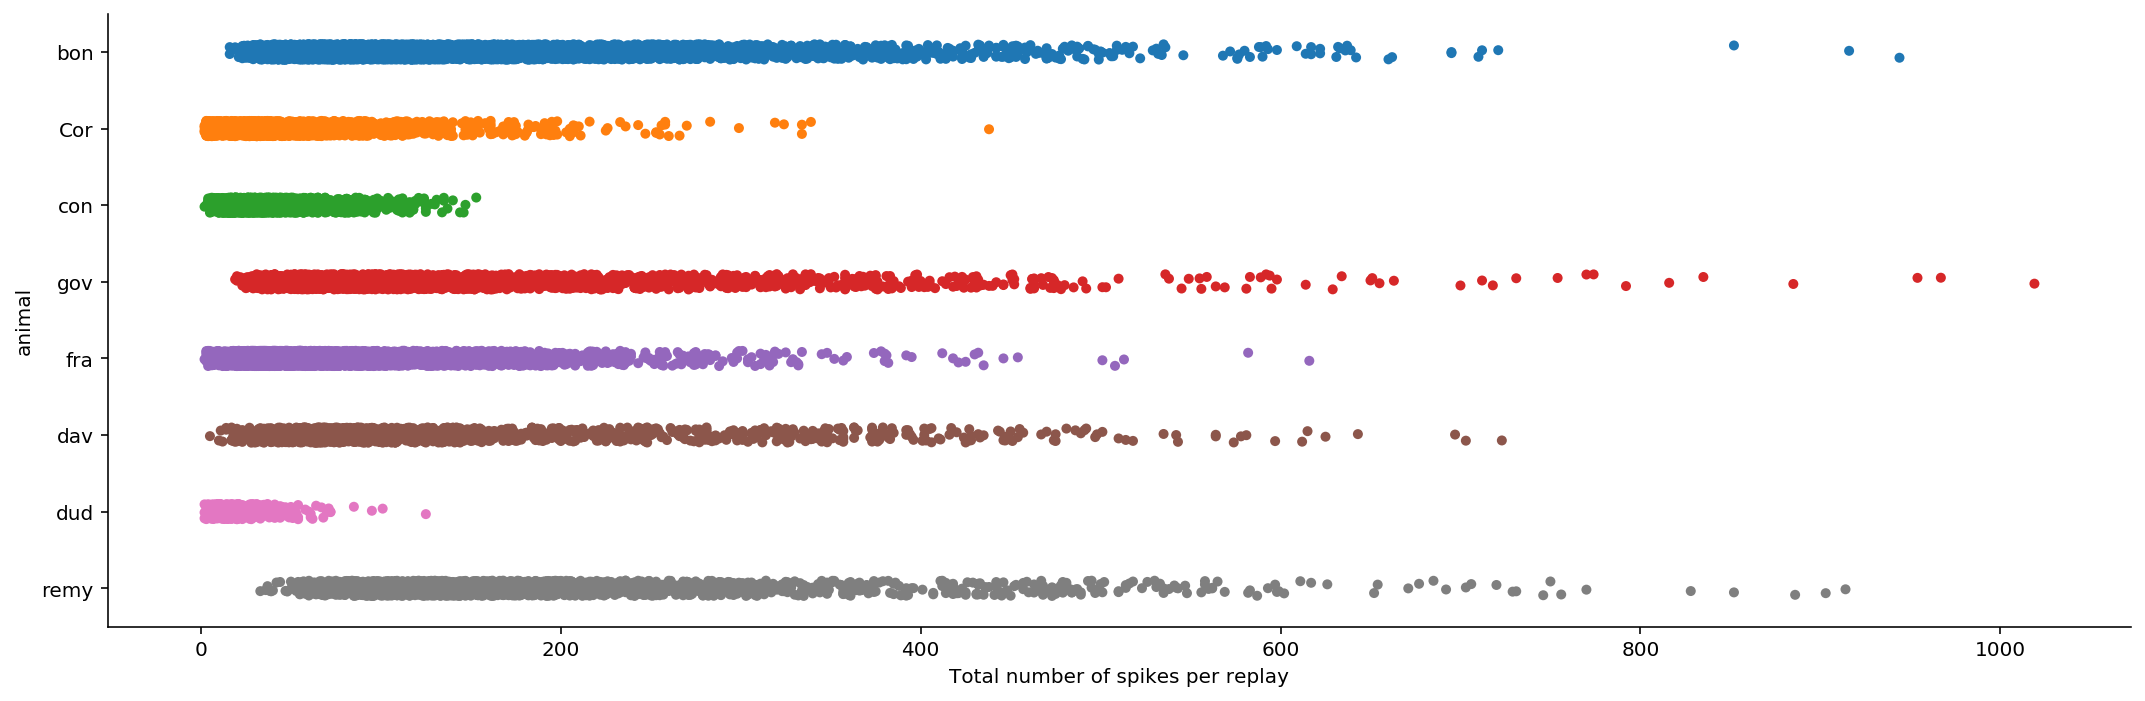

In [28]:
sns.catplot(x='n_total_spikes', y='animal', data=replay_info.reset_index(), kind="strip", aspect=3)
plt.xlabel('Total number of spikes per replay');